<a href="https://colab.research.google.com/github/AbinathAAA/Week05-customer_segmentation/blob/main/customer_segmentation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .appName("Tutorial_DF") \
                    .master("local[*]") \
                    .config("spark.executor.memory", "4g") \
                    .config("spark.driver.memory", "2g") \
                    .config("spark.executor.cores", "2") \
                    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
                    .getOrCreate()

# New section

# New section

In [ ]:
# Load CSV into DataFrame
file_path = "drive/My Drive/Colab Notebooks/customer_segmentation_dataset.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first 5 rows
print("Showing first 5 rows:")
df.show(5)

# Print schema of the DataFrame
print("Schema of DataFrame:")
df.printSchema(1)

Showing first 5 rows:
+---+-------------+--------------+-----------------+-------------------+----------------+
|age|annual_income|spending_score|years_as_customer|number_of_purchases|customer_segment|
+---+-------------+--------------+-----------------+-------------------+----------------+
| 22|       113441|            19|                2|                 44|       Low Value|
| 47|        85415|            74|                7|                 11|    Medium Value|
| 60|        78075|            18|               19|                 37|       Low Value|
| 44|        89388|            84|               10|                 15|      High Value|
| 37|        94910|            85|               15|                 31|      High Value|
+---+-------------+--------------+-----------------+-------------------+----------------+
only showing top 5 rows

Schema of DataFrame:
root
 |-- age: integer (nullable = true)
 |-- annual_income: integer (nullable = true)
 |-- spending_score: integer (nulla

In [ ]:
dataset = spark.read.csv('drive/My Drive/Colab Notebooks/customer_segmentation_dataset.csv',inferSchema=True, header =True)\
.toDF("age", "annual_income", "spending_score", "years_as_customer", "number_of_purchases","customer_segment")


dataset.select('customer_segment').distinct().show(10)
dataset.count()

+----------------+
|customer_segment|
+----------------+
|    Medium Value|
|      High Value|
|       Low Value|
+----------------+



2000000

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(\
inputCols=["age", "annual_income", "spending_score", "years_as_customer", "number_of_purchases"],\
outputCol="features")
df_temp = vector_assembler.transform(dataset)
df_temp.show(3)

+---+-------------+--------------+-----------------+-------------------+----------------+--------------------+
|age|annual_income|spending_score|years_as_customer|number_of_purchases|customer_segment|            features|
+---+-------------+--------------+-----------------+-------------------+----------------+--------------------+
| 22|       113441|            19|                2|                 44|       Low Value|[22.0,113441.0,19...|
| 47|        85415|            74|                7|                 11|    Medium Value|[47.0,85415.0,74....|
| 60|        78075|            18|               19|                 37|       Low Value|[60.0,78075.0,18....|
+---+-------------+--------------+-----------------+-------------------+----------------+--------------------+
only showing top 3 rows



In [ ]:
#Let’s remove unnecessary columns:
df = df_temp.drop('age', 'annual_income', "spending_score", "years_as_customer")
df.show(3)

+-------------------+----------------+--------------------+
|number_of_purchases|customer_segment|            features|
+-------------------+----------------+--------------------+
|                 44|       Low Value|[22.0,113441.0,19...|
|                 11|    Medium Value|[47.0,85415.0,74....|
|                 37|       Low Value|[60.0,78075.0,18....|
+-------------------+----------------+--------------------+
only showing top 3 rows



In [ ]:

from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCol="customer_segment", outputCol="customer_segment_index")
df = l_indexer.fit(df).transform(df)

df.select('customer_segment','customer_segment_index').distinct().show(3)

+----------------+----------------------+
|customer_segment|customer_segment_index|
+----------------+----------------------+
|      High Value|                   2.0|
|    Medium Value|                   1.0|
|       Low Value|                   0.0|
+----------------+----------------------+



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Assuming 'df' is your DataFrame with 'features' and 'customer_segment' columns
# If not, make sure you have run the previous steps to create these columns.

# Split the data into training and test sets (70% training, 30% testing)
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=1234)

dt = DecisionTreeClassifier(labelCol="customer_segment_index", featuresCol="features", impurity='entropy', maxDepth=4, seed=1234)
model = dt.fit(trainingData)
predictions = model.transform(testData)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="customer_segment_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Show some predictions
predictions.select("customer_segment", "customer_segment_index", "prediction").show(10)

Accuracy: 0.9798673045826596
+----------------+----------------------+----------+
|customer_segment|customer_segment_index|prediction|
+----------------+----------------------+----------+
|      High Value|                   2.0|       1.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
|      High Value|                   2.0|       2.0|
+----------------+----------------------+----------+
only showing top 10 rows



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt = DecisionTreeClassifier(labelCol="customer_segment_index", featuresCol="features",impurity='entropy', maxDepth=4,seed=1234)
model = dt.fit(trainingData)
predictions = model.transform(testData)

In [ ]:
# Split the data into training and test sets
trainingData, testData = df.randomSplit([0.7, 0.3], seed=1234)

# Fit the model
model = dt.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

In [ ]:
(trainingData, testData) = df.randomSplit([0.7, 0.3])

In [ ]:
evaluator = MulticlassClassificationEvaluator(\
labelCol="customer_segment_index", predictionCol="prediction",\
metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test accuracy =  " , accuracy)
print(model.toDebugString)

Test accuracy =   0.9798673045826596
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_c506930cc13d, depth=2, numNodes=5, numClasses=3, numFeatures=5
  If (feature 2 <= 49.5)
   Predict: 0.0
  Else (feature 2 > 49.5)
   If (feature 2 <= 76.5)
    Predict: 1.0
   Else (feature 2 > 76.5)
    Predict: 2.0



In [ ]:
# this is code for multiple classification using logistic Regression
from pyspark.ml.classification import OneVsRest
from pyspark.ml.classification import LogisticRegression
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
lr = LogisticRegression(maxIter=100, \

                        featuresCol="features", \

                        labelCol='customer_segment_index')
ovr = OneVsRest(classifier=lr, \
                labelCol='customer_segment_index', \
                featuresCol='features')
#from pyspark.ml import Pipeline
#pipeline_ovr = Pipeline(stages=[vecAssembler, stdScaler, ovr])
#pipelineModel_ovr = pipeline_ovr.fit(trainDF)

ovrModel = ovr.fit(train)
predictionsovr = ovrModel.transform(test)


evaluator = MulticlassClassificationEvaluator(\
labelCol="customer_segment_index", predictionCol="prediction",\
metricName="accuracy")
accuracy = evaluator.evaluate(predictionsovr)
print("Test accuracy =  " , accuracy)

Test accuracy =   1.0


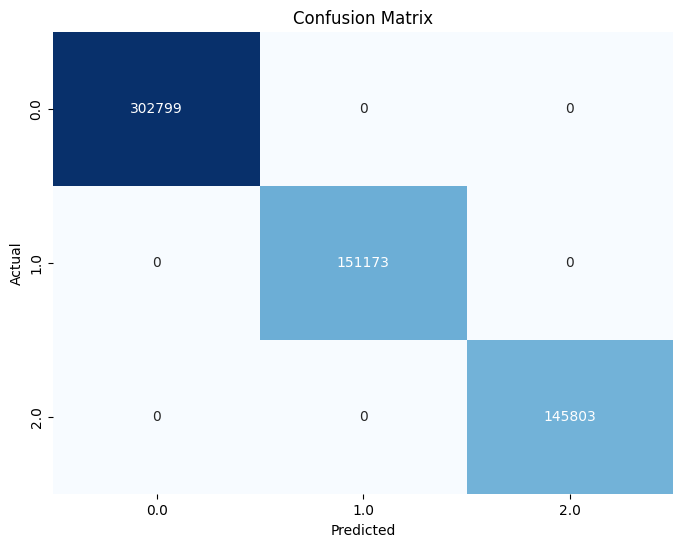

Test accuracy =   1.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create MulticlassMetrics object

 #Convert predictions and labels to RDD for MulticlassMetrics

prediction_and_labels = predictionsovr.select("prediction", "customer_segment_index") \
    .withColumnRenamed("customer_segment_index", "customer_segment") \
    .toPandas()  # Convert to Pandas DataFrame for easier manipulation

# Create a confusion matrix using Pandas

confusion_matrix = pd.crosstab(prediction_and_labels['customer_segment'], prediction_and_labels['prediction'], rownames=['Actual'], colnames=['Predicted'])



# Plot the confusion matrix using Seaborn and Matplotlib

plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()



evaluator = MulticlassClassificationEvaluator(\

labelCol="customer_segment_index", predictionCol="prediction",\

metricName="accuracy")

accuracy = evaluator.evaluate(predictionsovr)

print("Test accuracy =  " , accuracy)